### Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


### Loading Data 

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotify_dataset.csv')
df

,Serial Number,Song,Artist,Genres,Album,Duration,Album Label,Country,Streams
0,1,"Pani Da Rang Male (From ""Vicky Donor"")",Ayushmann Khurrana,World/Traditional,Vicky Donor,04:00,Eros Music,India,NaN
1,2,Channa Mereya,"Pritam,Arijit Singh",World/Traditional,Ae Dil Hai Mushkil (Original Motion Picture So...,04:49,Sony Music Entertainment India Pvt. Ltd.,India,NaN
2,3,Chand Sifarish,"Jatin-Lalit,Shaan,Kailash Kher,Prasoon Joshi","Pop, World/Traditional, Hip Hop",Fanaa,04:35,YRF Music,India,NaN
3,4,Yeh Fitoor Mera,Arijit Singh,World/Traditional,Fitoor,04:43,Zee Music Company,India,NaN
4,5,"Galliyan (From ""Ek Villain"")",Ankit Tiwari,World/Traditional,Best Of Shraddha Kapoor,05:40,T-Series,India,NaN
...,...,...,...,...,...,...,...,...,...
165,166,Myself,Post Malone,Hip Hop,Hollywood's Bleeding,02:38,Republic Records,India,NaN
166,167,La La La,"Naughty Boy,Sam Smith","Pop, Dance/Electronic, R&B",Hotel Cabana (Deluxe Version),03:42,Virgin Records Ltd,India,NaN
167,168,"Hotel California - Live at The Forum, Los Ang...",Eagles,"Rock, Country",Hotel California (40th Anniversary Expanded Ed...,06:49,Rhino/Elektra,India,NaN
168,169,All Time Low,Jon Bellion,Hip Hop,The Human Condition,03:37,Capitol Records (CAP),India,NaN


### Data Cleaning

In [5]:
df.shape

(170, 9)

Terdapat 170 baris dengan 9 kolom pada file dataset Spotify Playits

---



In [17]:
# Melakukan pengecekan missing value pada dataset
df.isnull().sum()

Song           0
Artist         0
Genres         8
Album          0
Duration       0
Album Label    1
Country        3
dtype: int64

Terdapat nilai kosong atau NULL/NAN pada dataset yaitu di kolom Country dan Streams

In [15]:
# Hapus kolom yang tidak digunakan, disini saya akan akan menghapus kolom  Sreams, karena datanya semuanya kosong dan tidak akan digunakan.
df.drop(['Streams'], axis = 1, inplace = True)

In [16]:
# Perubahan dataset setelah melakukan drop columns Streams
df.head(10)

,Song,Artist,Genres,Album,Duration,Album Label,Country
0,"Pani Da Rang Male (From ""Vicky Donor"")",Ayushmann Khurrana,World/Traditional,Vicky Donor,04:00,Eros Music,India
1,Channa Mereya,"Pritam,Arijit Singh",World/Traditional,Ae Dil Hai Mushkil (Original Motion Picture So...,04:49,Sony Music Entertainment India Pvt. Ltd.,India
2,Chand Sifarish,"Jatin-Lalit,Shaan,Kailash Kher,Prasoon Joshi","Pop, World/Traditional, Hip Hop",Fanaa,04:35,YRF Music,India
3,Yeh Fitoor Mera,Arijit Singh,World/Traditional,Fitoor,04:43,Zee Music Company,India
4,"Galliyan (From ""Ek Villain"")",Ankit Tiwari,World/Traditional,Best Of Shraddha Kapoor,05:40,T-Series,India
5,Samjhawan,"Jawad Ahmad,Shaarib Toshi,Arijit Singh,Shreya ...",World/Traditional,Samjhawan,04:29,Sony Music Entertainment India Pvt. Ltd.,India
6,Banjaara,Mohammed Irfan,World/Traditional,Ek Villain,05:36,T-Series,India
7,Zaroorat,Mustafa Zahid,"Hip Hop, World/Traditional",Ek Villain,06:08,T-Series,India
8,Kabhii Tumhhe,"Javed-Mohsin,Darshan Raval",World/Traditional,Shershaah (Original Motion Picture Soundtrack),03:50,Sony Music Entertainment India Pvt. Ltd.,India
9,"Pachtaoge (From ""Jaani Ve"")","Arijit Singh,B Praak","World/Traditional, Hip Hop","Pachtaoge (From ""Jaani Ve"")",03:46,T-Series,India


In [18]:
# Check data yang duplikat pada datasets
df.duplicated().sum()

0

Pada dataset tidak ada yang duplikat

In [20]:
# Melakukan split data pada kolom duration  
df[['minutes', 'second']] = df['Duration'].str.split(':', expand=True)

In [21]:
# Data telah di split
df.head(10)

,Song,Artist,Genres,Album,Duration,Album Label,Country,minutes,second
0,"Pani Da Rang Male (From ""Vicky Donor"")",Ayushmann Khurrana,World/Traditional,Vicky Donor,04:00,Eros Music,India,04,00
1,Channa Mereya,"Pritam,Arijit Singh",World/Traditional,Ae Dil Hai Mushkil (Original Motion Picture So...,04:49,Sony Music Entertainment India Pvt. Ltd.,India,04,49
2,Chand Sifarish,"Jatin-Lalit,Shaan,Kailash Kher,Prasoon Joshi","Pop, World/Traditional, Hip Hop",Fanaa,04:35,YRF Music,India,04,35
3,Yeh Fitoor Mera,Arijit Singh,World/Traditional,Fitoor,04:43,Zee Music Company,India,04,43
4,"Galliyan (From ""Ek Villain"")",Ankit Tiwari,World/Traditional,Best Of Shraddha Kapoor,05:40,T-Series,India,05,40
5,Samjhawan,"Jawad Ahmad,Shaarib Toshi,Arijit Singh,Shreya ...",World/Traditional,Samjhawan,04:29,Sony Music Entertainment India Pvt. Ltd.,India,04,29
6,Banjaara,Mohammed Irfan,World/Traditional,Ek Villain,05:36,T-Series,India,05,36
7,Zaroorat,Mustafa Zahid,"Hip Hop, World/Traditional",Ek Villain,06:08,T-Series,India,06,08
8,Kabhii Tumhhe,"Javed-Mohsin,Darshan Raval",World/Traditional,Shershaah (Original Motion Picture Soundtrack),03:50,Sony Music Entertainment India Pvt. Ltd.,India,03,50
9,"Pachtaoge (From ""Jaani Ve"")","Arijit Singh,B Praak","World/Traditional, Hip Hop","Pachtaoge (From ""Jaani Ve"")",03:46,T-Series,India,03,46


In [24]:
# Menghitung durasi menit pada setiap baris 
df.minutes.value_counts()

03            78
04            39
02            32
05             9
06             6
01             5
02-12-2016     1
Name: minutes, dtype: int64

In [39]:
# Menghapus data yang outlier
df.drop(df.index[df['minutes'] == '02-12-2016'], inplace=True)

In [41]:
df.head(10)

,Song,Artist,Genres,Album,Duration,Album Label,Country,minutes,second
0,"Pani Da Rang Male (From ""Vicky Donor"")",Ayushmann Khurrana,World/Traditional,Vicky Donor,04:00,Eros Music,India,04,00
1,Channa Mereya,"Pritam,Arijit Singh",World/Traditional,Ae Dil Hai Mushkil (Original Motion Picture So...,04:49,Sony Music Entertainment India Pvt. Ltd.,India,04,49
2,Chand Sifarish,"Jatin-Lalit,Shaan,Kailash Kher,Prasoon Joshi","Pop, World/Traditional, Hip Hop",Fanaa,04:35,YRF Music,India,04,35
3,Yeh Fitoor Mera,Arijit Singh,World/Traditional,Fitoor,04:43,Zee Music Company,India,04,43
4,"Galliyan (From ""Ek Villain"")",Ankit Tiwari,World/Traditional,Best Of Shraddha Kapoor,05:40,T-Series,India,05,40
5,Samjhawan,"Jawad Ahmad,Shaarib Toshi,Arijit Singh,Shreya ...",World/Traditional,Samjhawan,04:29,Sony Music Entertainment India Pvt. Ltd.,India,04,29
6,Banjaara,Mohammed Irfan,World/Traditional,Ek Villain,05:36,T-Series,India,05,36
7,Zaroorat,Mustafa Zahid,"Hip Hop, World/Traditional",Ek Villain,06:08,T-Series,India,06,08
8,Kabhii Tumhhe,"Javed-Mohsin,Darshan Raval",World/Traditional,Shershaah (Original Motion Picture Soundtrack),03:50,Sony Music Entertainment India Pvt. Ltd.,India,03,50
9,"Pachtaoge (From ""Jaani Ve"")","Arijit Singh,B Praak","World/Traditional, Hip Hop","Pachtaoge (From ""Jaani Ve"")",03:46,T-Series,India,03,46


In [42]:
# Mengubah tipe data kolom minutes dan second menjadi int 
f['minutes'] = df['minutes'].astype(int)
df['second'] = df['second'].astype(int)

In [43]:
df.dtypes

Song           object
Artist         object
Genres         object
Album          object
Duration       object
Album Label    object
Country        object
minutes         int64
second          int64
dtype: object

In [44]:
# Menghitung total durasi dalam satuan second 
total_duration = (df.minutes * 60) + df.second 
df['total_duration'] = total_duration

In [45]:
df.head(10)

,Song,Artist,Genres,Album,Duration,Album Label,Country,minutes,second,total_duration
0,"Pani Da Rang Male (From ""Vicky Donor"")",Ayushmann Khurrana,World/Traditional,Vicky Donor,04:00,Eros Music,India,4,0,240
1,Channa Mereya,"Pritam,Arijit Singh",World/Traditional,Ae Dil Hai Mushkil (Original Motion Picture So...,04:49,Sony Music Entertainment India Pvt. Ltd.,India,4,49,289
2,Chand Sifarish,"Jatin-Lalit,Shaan,Kailash Kher,Prasoon Joshi","Pop, World/Traditional, Hip Hop",Fanaa,04:35,YRF Music,India,4,35,275
3,Yeh Fitoor Mera,Arijit Singh,World/Traditional,Fitoor,04:43,Zee Music Company,India,4,43,283
4,"Galliyan (From ""Ek Villain"")",Ankit Tiwari,World/Traditional,Best Of Shraddha Kapoor,05:40,T-Series,India,5,40,340
5,Samjhawan,"Jawad Ahmad,Shaarib Toshi,Arijit Singh,Shreya ...",World/Traditional,Samjhawan,04:29,Sony Music Entertainment India Pvt. Ltd.,India,4,29,269
6,Banjaara,Mohammed Irfan,World/Traditional,Ek Villain,05:36,T-Series,India,5,36,336
7,Zaroorat,Mustafa Zahid,"Hip Hop, World/Traditional",Ek Villain,06:08,T-Series,India,6,8,368
8,Kabhii Tumhhe,"Javed-Mohsin,Darshan Raval",World/Traditional,Shershaah (Original Motion Picture Soundtrack),03:50,Sony Music Entertainment India Pvt. Ltd.,India,3,50,230
9,"Pachtaoge (From ""Jaani Ve"")","Arijit Singh,B Praak","World/Traditional, Hip Hop","Pachtaoge (From ""Jaani Ve"")",03:46,T-Series,India,3,46,226


In [46]:
# Selanjutnya kita akan menghapus kolom duration, minutes dans second karena sudah cukup menggunakan kolom total_duration 
df.drop(['Duration', 'minutes', 'second'], axis = 1, inplace = True)

In [47]:
df.head(10)

,Song,Artist,Genres,Album,Album Label,Country,total_duration
0,"Pani Da Rang Male (From ""Vicky Donor"")",Ayushmann Khurrana,World/Traditional,Vicky Donor,Eros Music,India,240
1,Channa Mereya,"Pritam,Arijit Singh",World/Traditional,Ae Dil Hai Mushkil (Original Motion Picture So...,Sony Music Entertainment India Pvt. Ltd.,India,289
2,Chand Sifarish,"Jatin-Lalit,Shaan,Kailash Kher,Prasoon Joshi","Pop, World/Traditional, Hip Hop",Fanaa,YRF Music,India,275
3,Yeh Fitoor Mera,Arijit Singh,World/Traditional,Fitoor,Zee Music Company,India,283
4,"Galliyan (From ""Ek Villain"")",Ankit Tiwari,World/Traditional,Best Of Shraddha Kapoor,T-Series,India,340
5,Samjhawan,"Jawad Ahmad,Shaarib Toshi,Arijit Singh,Shreya ...",World/Traditional,Samjhawan,Sony Music Entertainment India Pvt. Ltd.,India,269
6,Banjaara,Mohammed Irfan,World/Traditional,Ek Villain,T-Series,India,336
7,Zaroorat,Mustafa Zahid,"Hip Hop, World/Traditional",Ek Villain,T-Series,India,368
8,Kabhii Tumhhe,"Javed-Mohsin,Darshan Raval",World/Traditional,Shershaah (Original Motion Picture Soundtrack),Sony Music Entertainment India Pvt. Ltd.,India,230
9,"Pachtaoge (From ""Jaani Ve"")","Arijit Singh,B Praak","World/Traditional, Hip Hop","Pachtaoge (From ""Jaani Ve"")",T-Series,India,226


In [49]:
df.describe()

,total_duration
count,169.000000
mean,220.147929
std,58.466377
min,95.000000
25%,184.000000
50%,213.000000
75%,247.000000
max,409.000000


### Data Analysis

In [54]:
# Data TOP 5 Album Labels
value_counts = pd.DataFrame({'Top 5 Album Labels': df['Album Label'].value_counts().head(10)})
value_counts.style.background_gradient(cmap='PuBu')

,Top 5 Album Labels
T-Series,16
Republic Records,14
Sony Music Entertainment India Pvt. Ltd.,7
Columbia,5
Atlantic Records,4
"Bad Vibes Forever, LLC",4
"Genie Music Corporation, Stone Music Entertainment",3
Atlantic Records UK,3
Bad Vibes Forever / EMPIRE,3
Disruptor Records/Columbia,3


In [57]:
# Data TOP 5 Genre
value_counts = pd.DataFrame({'Top 5 Genre': df['Genres'].value_counts().head(10)})
value_counts.style.background_gradient(cmap='hot')

,Top 5 Genre
Hip Hop,27
Pop,24
World/Traditional,19
"Hip Hop, World/Traditional",9
"Pop, Dance/Electronic",7
"R&B, Pop",7
Dance/Electronic,6
"Hip Hop, World/Traditional, Rock, Dance/Electronic",4
Rock,4
"World/Traditional, Hip Hop",3


<function matplotlib.pyplot.show>

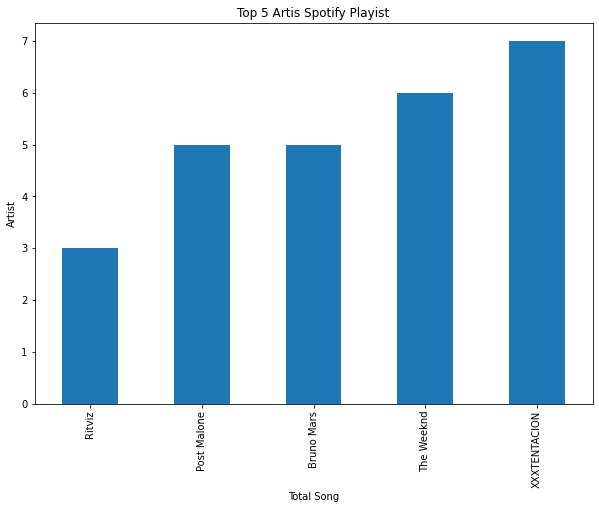

In [60]:
# Melakukan visualisasi 
plt.figure(figsize = (10, 7))
df['Artist'].value_counts().head(5).sort_values().plot(kind='bar')
plt.xlabel('Total Song')
plt.ylabel('Artist')
plt.title('Top 5 Artist Spotify Playist')
plt.show

Setelah melakukan visualisasi dapat diketahui untuk Top 5 Artis Spotify Playist dengan posisi tertinggi XXXTENTACION, The Weeknd, Bruno Mars, Post Malone dan Ritviz

Credit by Shopi Nurhidayanti 
Garut, 16 Juli 2022 